In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import sys

### 단순 선형 회귀 모델
- wx + b

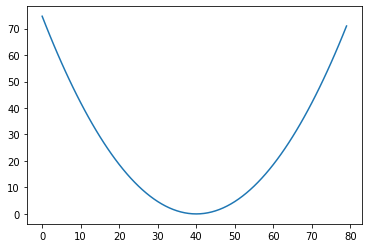

In [4]:
# 데이터 준비 
x_train = [1, 2, 3]   # 입력 데이터
y_train = [1, 2, 3]   # 출력 데이터

W = tf.placeholder(tf.float32)

# 가설 준비( Wx + b )

hypoth= W * x_train 

# 비용 함수 
cost = tf.reduce_mean(tf.square(hypoth - y_train))
#--------------------------- 텐서플로우의 그래프 완성 --------------------------------#

# 비용함수를 그래프로 그려보기 
sess = tf.Session()

cost_val = []
for i in range(-30, 50):
    result = sess.run(cost, feed_dict={W : i*0.1})
    cost_val.append(result)
    
plt.plot(cost_val)
sess.close()

### 경사 하강 알고리즘을 이용한 가중치 학습

- 알파는 보폭 

In [28]:
# 데이터 준비 
x_train = [1, 2, 3]
y_train = [1, 2, 3]

# 왜 Variable를 사용해야 하는 가
W = tf.Variable(tf.random_normal([1]), dtype = tf.float32, name="Weight") #name은 생략가능
b = tf.Variable(tf.random_normal([1]), dtype = tf.float32, name="bias")

# 가설 준비
hypot = W * x_train + b

# 비용 함수 (MSE 평균 제곱 오차)
cost = tf.reduce_mean(tf.square(hypot - y_train))

# 최저 비용 학습을 위한 경사 하강 알고리즘(Gradient Descent)
gradient = tf.reduce_mean((hypot - y_train) * x_train)
learning_rate = 0.1
descent = W - (learning_rate * gradient) #  learning_rate은 하이퍼 파라미터
update = W.assign(descent) # 텐서 플로우에서는 W = descent 직접적으로 넣을 수 없고 assign으로 간접적으로 넣어줘야한다.

########## Graph 작업 완료 ##################

sess = tf.Session()
sess.run(tf.global_variables_initializer())
#얼만큼 학습시킬 것인지
for step in range(21):
    _, weight, c=sess.run([update, W, cost])
    print(step, weight, c)
    
    
sess.close()

0 [0.36181965] 7.140972
1 [0.66969144] 2.0314686
2 [0.8338897] 0.57809836
3 [0.9214621] 0.16469516
4 [0.9681674] 0.04710495
5 [0.99307686] 0.0136570595
6 [1.006362] 0.004143022
7 [1.0134473] 0.0014367932
8 [1.0172261] 0.00066702743
9 [1.0192416] 0.00044807149
10 [1.0203165] 0.00038578748
11 [1.0208898] 0.00036807082
12 [1.0211955] 0.00036303277
13 [1.0213585] 0.00036160054
14 [1.0214455] 0.00036119207
15 [1.0214919] 0.00036107606
16 [1.0215167] 0.00036104195
17 [1.0215298] 0.00036103255
18 [1.0215368] 0.0003610322
19 [1.0215405] 0.00036103025
20 [1.0215425] 0.0003610289


In [31]:
# 데이터 준비 
x_train = tf.placeholder(tf.float32, shape=[None])
y_train = tf.placeholder(tf.float32, shape=[None])

# 왜 Variable를 사용해야 하는 가
W = tf.Variable(tf.random_normal([1]), dtype = tf.float32, name="Weight") #name은 생략가능
b = tf.Variable(tf.random_normal([1]), dtype = tf.float32, name="bias")

# 가설 준비
hypot = W * x_train + b

# 비용 함수 (MSE 평균 제곱 오차)
cost = tf.reduce_mean(tf.square(hypot - y_train))

# 최저 비용 학습을 위한 경사 하강 알고리즘(Gradient Descent)
gradient = tf.reduce_mean((hypot - y_train) * x_train)
learning_rate = 0.1
descent = W - (learning_rate * gradient) #  learning_rate은 하이퍼 파라미터
update = W.assign(descent) # 텐서 플로우에서는 W = descent 직접적으로 넣을 수 없고 assign으로 간접적으로 넣어줘야한다.

########## Graph 작업 완료 ##################

sess = tf.Session()
sess.run(tf.global_variables_initializer(), )
#얼만큼 학습시킬 것인지
for step in range(21):
    _, weight, c=sess.run([update, W, cost], feed_dict={x_train:[1,2,3,4,5],y_train:[1,2,3,4,5] })
    print(step, weight, c)
    
    
sess.close()

0 [1.2053505] 9.294002
1 [1.1044114] 0.124163195
2 [1.1145053] 0.032464862
3 [1.113496] 0.03154788
4 [1.1135969] 0.031538703
5 [1.1135868] 0.031538613
6 [1.1135877] 0.031538628
7 [1.1135876] 0.03153863
8 [1.1135877] 0.0315386
9 [1.1135876] 0.03153863
10 [1.1135877] 0.0315386
11 [1.1135876] 0.03153863
12 [1.1135877] 0.0315386
13 [1.1135876] 0.03153863
14 [1.1135877] 0.0315386
15 [1.1135876] 0.03153863
16 [1.1135877] 0.0315386
17 [1.1135876] 0.03153863
18 [1.1135877] 0.0315386
19 [1.1135876] 0.03153863
20 [1.1135877] 0.0315386


In [34]:
################### 경사하강 알고리즘 객체 사용 ##############################
# 데이터 준비 
x_train = tf.placeholder(tf.float32, shape=[None])
y_train = tf.placeholder(tf.float32, shape=[None])

# 왜 Variable를 사용해야 하는 가
W = tf.Variable(tf.random_normal([1]), dtype = tf.float32, name="Weight") #name은 생략가능
b = tf.Variable(tf.random_normal([1]), dtype = tf.float32, name="bias")

# 가설 준비
hypot = W * x_train + b

# 비용 함수 (MSE 평균 제곱 오차)
cost = tf.reduce_mean(tf.square(hypot - y_train))


# 최저 비용 학습을 위한 경사 하강 알고리즘(Gradient Descent)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01) #준비만 한것 
train = optimizer.minimize(cost) #최소값을 찾아가는 동작을 하는 함수 

########## Graph 작업 완료 ##################

sess = tf.Session()
sess.run(tf.global_variables_initializer(), )
#얼만큼 학습시킬 것인지
for step in range(21):
    _, weight, c=sess.run([train, W, cost], feed_dict={x_train:[1,2,3,4,5],y_train:[1,2,3,4,5] })
    print(step, weight, c)
    
    
sess.close()

0 [0.7578393] 5.553563
1 [0.87456673] 3.2999973
2 [0.9634733] 1.9863005
3 [1.0311426] 1.2203162
4 [1.0826005] 0.7735149
5 [1.1216836] 0.5127202
6 [1.1513207] 0.36032358
7 [1.1737475] 0.2710989
8 [1.1906708] 0.2186906
9 [1.2033936] 0.18773986
10 [1.2129103] 0.16929626
11 [1.2199804] 0.15814397
12 [1.2251832] 0.15124334
13 [1.2289615] 0.14682324
14 [1.2316527] 0.14385118
15 [1.2335149] 0.14172575
16 [1.2347449] 0.1400964
17 [1.2354928] 0.13875864
18 [1.2358735] 0.13759348
19 [1.2359743] 0.13653155
20 [1.2358623] 0.1355323


In [69]:
# 데이터 준비 
x_train = tf.placeholder(tf.float32, shape=[None])
y_train = tf.placeholder(tf.float32, shape=[None])

# W=1 b = 1.1 
W = tf.Variable(tf.random_normal([1]), dtype = tf.float32, name="Weight") #name은 생략가능
b = tf.Variable(tf.random_normal([1]), dtype = tf.float32, name="bias")


# 가설 준비
hypot = W * x_train + b

# 비용 함수 (MSE 평균 제곱 오차)
cost = tf.reduce_mean(tf.square(hypot - y_train))


# 최저 비용 학습을 위한 경사 하강 알고리즘(Gradient Descent)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01) #준비만 한것 
train = optimizer.minimize(cost) #최소값을 찾아가는 동작을 하는 함수 

########## Graph 작업 완료 ##################

sess = tf.Session()
sess.run(tf.global_variables_initializer(), )
#얼만큼 학습시킬 것인지
for step in range(1001):
    _, c, weight, bias=sess.run([train, cost, W, b], feed_dict={x_train:[1, 2, 3, 4, 5],
                                                       y_train:[2.1, 3.1, 4.1, 5.1, 6.1] })
    if step % 10 == 0 :
        print(step, c, weight, bias)
    
    

0 36.040474 [2.5084605] [0.6368911]
10 0.27686614 [1.3052192] [0.33294734]
20 0.10785936 [1.2175653] [0.3370266]
30 0.10011415 [1.2051125] [0.360991]
40 0.09355445 [1.1979324] [0.3855029]
50 0.08742756 [1.1913178] [0.409289]
60 0.0817018 [1.1849453] [0.43228915]
70 0.07635105 [1.1787865] [0.45452377]
80 0.07135074 [1.172833] [0.47601804]
90 0.06667791 [1.1670777] [0.49679652]
100 0.062311154 [1.1615139] [0.51688313]
110 0.058230348 [1.1561357] [0.5363008]
120 0.054416757 [1.1509364] [0.555072]
130 0.050852984 [1.1459101] [0.573218]
140 0.047522575 [1.1410513] [0.5907599]
150 0.044410266 [1.1363543] [0.60771763]
160 0.041501783 [1.1318138] [0.62411046]
170 0.0387838 [1.1274244] [0.63995755]
180 0.03624383 [1.1231812] [0.6552769]
190 0.033870153 [1.1190792] [0.6700862]
200 0.031651966 [1.115114] [0.6844023]
210 0.029579083 [1.1112806] [0.69824165]
220 0.027641904 [1.1075749] [0.71162015]
230 0.025831604 [1.1039928] [0.7245531]
240 0.024139898 [1.1005298] [0.7370554]
250 0.022558939 [1.09

In [70]:
# Testing 
print(sess.run(hypot, feed_dict={x_train : [27]}))
print(sess.run(hypot, feed_dict={x_train : [2.5, 3.7]}))
sess.close()

[28.279264]
[3.5914903 4.8006873]


In [74]:
# 아래의 데이터를 가지고 하루 8시간을 일했을 때 매출액이 얼마인지 예측하시오
x_data = [1, 2, 3, 4, 5, 6, 7] #시간
y_data = [25000, 55000, 75000, 110000, 128000, 155000, 180000] #매출액

x_train = tf.placeholder(tf.float32, shape=[None])
y_train = tf.placeholder(tf.float32, shape=[None])

# W=1 b = 1.1 
W = tf.Variable(tf.random_normal([1]), dtype = tf.float32, name="Weight") #name은 생략가능
b = tf.Variable(tf.random_normal([1]), dtype = tf.float32, name="bias")


# 가설 준비
hypot = W * x_train + b

# 비용 함수 (MSE 평균 제곱 오차)
cost = tf.reduce_mean(tf.square(hypot - y_train))


# 최저 비용 학습을 위한 경사 하강 알고리즘(Gradient Descent)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01) #준비만 한것 
train = optimizer.minimize(cost) #최소값을 찾아가는 동작을 하는 함수 

########## Graph 작업 완료 ##################

sess = tf.Session()
sess.run(tf.global_variables_initializer(), )
#얼만큼 학습시킬 것인지
for step in range(1001):
    _, c, weight, bias=sess.run([train, cost, W, b], feed_dict={x_train:x_data,
                                                       y_train: y_data })
    if step % 10 == 0 :
        print(step, c, weight, bias)
    

0 13457222000.0 [10369.999] [2080.487]
10 11322957.0 [24878.383] [4869.14]
20 10859793.0 [24971.387] [4752.0713]
30 10694651.0 [24997.057] [4626.539]
40 10541754.0 [25021.46] [4505.692]
50 10400193.0 [25044.941] [4389.4106]
60 10269131.0 [25067.537] [4277.524]
70 10147785.0 [25089.277] [4169.866]
80 10035441.0 [25110.197] [4066.2761]
90 9931427.0 [25130.326] [3966.6006]
100 9835121.0 [25149.693] [3870.691]
110 9745955.0 [25168.33] [3778.4058]
120 9663407.0 [25186.262] [3689.6086]
130 9586978.0 [25203.516] [3604.1667]
140 9516215.0 [25220.117] [3521.954]
150 9450697.0 [25236.092] [3442.8477]
160 9390041.0 [25251.463] [3366.7302]
170 9333884.0 [25266.254] [3293.489]
180 9281885.0 [25280.486] [3223.0164]
190 9233742.0 [25294.18] [3155.206]
200 9189173.0 [25307.355] [3089.958]
210 9147906.0 [25320.033] [3027.1758]
220 9109703.0 [25332.232] [2966.7666]
230 9074331.0 [25343.97] [2908.64]
240 9041578.0 [25355.266] [2852.7102]
250 9011259.0 [25366.133] [2798.8943]
260 8983183.0 [25376.588] [27

In [75]:
print(sess.run(hypot, feed_dict={x_train : [8]}))
sess.close()

[206524.5]


In [111]:
# 아래의 데이터를 가지고 하루 8시간을 일했을 때 매출액이 얼마인지 예측하시오
x_data = [1, 2, 3, 4, 5, 6, 7] #시간
y_data = [25000, 55000, 75000, 110000, 128000, 155000, 180000] #매출액

X = tf.placeholder(tf.float32, shape=[None])
y = tf.placeholder(tf.float32, shape=[None])

# W=1 b = 1.1 
W = tf.Variable(tf.random_normal([1]), dtype = tf.float32, name="Weight") #name은 생략가능
b = tf.Variable(tf.random_normal([1]), dtype = tf.float32, name="bias")


# 가설 준비
hypot = W * X + b

# 비용 함수 (MSE 평균 제곱 오차)
cost = tf.reduce_mean(tf.square(hypot - y))


# 최저 비용 학습을 위한 경사 하강 알고리즘(Gradient Descent)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01) #준비만 한것 
train = optimizer.minimize(cost) #최소값을 찾아가는 동작을 하는 함수 

########## Graph 작업 완료 ##################

sess = tf.Session()
sess.run(tf.global_variables_initializer(), )
#얼만큼 학습시킬 것인지
for step in range(1001):
    _, c, weight, bias=sess.run([train, cost, W, b], feed_dict={X:x_data,
                                                       y: y_data })
    if step % 10 == 0 :
        print(step, c, weight, bias)
    

0 13454944000.0 [10371.243] [2080.6772]
10 11322831.0 [24878.398] [4869.086]
20 10859731.0 [24971.396] [4752.0195]
30 10694587.0 [24997.066] [4626.49]
40 10541698.0 [25021.47] [4505.6455]
50 10400144.0 [25044.951] [4389.367]
60 10269077.0 [25067.545] [4277.482]
70 10147742.0 [25089.285] [4169.8247]
80 10035397.0 [25110.205] [4066.2358]
90 9931382.0 [25130.334] [3966.5618]
100 9835082.0 [25149.701] [3870.6538]
110 9745926.0 [25168.336] [3778.3699]
120 9663374.0 [25186.268] [3689.574]
130 9586945.0 [25203.521] [3604.1333]
140 9516187.0 [25220.125] [3521.9211]
150 9450671.0 [25236.1] [3442.8154]
160 9390015.0 [25251.469] [3366.6995]
170 9333861.0 [25266.26] [3293.46]
180 9281864.0 [25280.49] [3222.989]
190 9233727.0 [25294.184] [3155.1804]
200 9189159.0 [25307.361] [3089.9338]
210 9147889.0 [25320.04] [3027.1528]
220 9109689.0 [25332.236] [2966.7449]
230 9074316.0 [25343.977] [2908.6191]
240 9041570.0 [25355.27] [2852.69]
250 9011243.0 [25366.137] [2798.8743]
260 8983177.0 [25376.592] [27

In [112]:
print(sess.run(hypot, feed_dict={X : [8]}))
sess.close()

[206524.5]


### 다중 선형 회귀 모델 

In [113]:
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 196., 142.]

#### 1) 단순하게 처리하는 경우

In [117]:
X1 = tf.placeholder(tf.float32, shape=[None])
X2 = tf.placeholder(tf.float32, shape=[None])
X3 = tf.placeholder(tf.float32, shape=[None])

y = tf.placeholder(tf.float32, shape=[None])

W1 = tf.Variable(tf.random_normal([1]), name='weight1')
W2 = tf.Variable(tf.random_normal([1]), name='weight2')
W3 = tf.Variable(tf.random_normal([1]), name='weight3')
b = tf.Variable(tf.random_normal([1]), name='bias')

# 가설 설정 
hypot= W1*X1 + W2*X2 + W3*X3 + b

# 비용 함수 
cost = tf.reduce_mean(tf.square(hypot - y))

# 최소 비용 계산
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

########## 그래프 완성 #############


In [118]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(9000):
        _,  c, h = sess.run([train, cost, hypot], feed_dict={X1:x1_data, X2:x2_data, X3:x3_data, y: y_data})
        if step % 500 == 0 :
            print(step, c, h)    

0 90845.39 [-116.547485 -136.7447   -136.85687  -145.46507  -106.17913 ]
500 4.2158737 [150.7729  184.76808 179.82782 199.3608  139.13727]
1000 4.0327682 [150.67862 184.8373  179.80478 199.29866 139.2665 ]
1500 3.874292 [150.59868 184.89664 179.78607 199.2402  139.3823 ]
2000 3.735065 [150.53122 184.94737 179.77112 199.18501 139.48633]
2500 3.6109009 [150.47467 184.99059 179.75945 199.13269 139.58005]
3000 3.4987674 [150.42755 185.02727 179.75058 199.08298 139.66472]
3500 3.3961148 [150.3887  185.05824 179.7442  199.03555 139.74149]
4000 3.3012364 [150.357   185.08423 179.73991 198.99022 139.81126]
4500 3.2125955 [150.33153 185.10591 179.73749 198.94673 139.87495]
5000 3.1290398 [150.31151 185.12383 179.73666 198.90486 139.93329]
5500 3.0498576 [150.29617 185.13846 179.73721 198.8645  139.98688]
6000 2.9743226 [150.28493 185.1502  179.73894 198.82549 140.03632]
6500 2.9019592 [150.27722 185.15952 179.7417  198.7877  140.08209]
7000 2.8323567 [150.27258 185.1667  179.74535 198.75105 140

#### 2) Matrix로 처리하는 경우

In [122]:
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [[152.], 
          [185.], 
          [180.], 
          [196.], 
          [142.]]

x_data = [[73., 80., 75.], 
          [93., 88., 93.],
          [89., 91., 90.], 
          [96., 98., 100.], 
          [73., 66., 70.]]

In [123]:
X = tf.placeholder(tf.float32, shape=[None, 3])  #shape=[행, 렬] None=데이터의갯수와 상관없이 입력받고싶을때
y = tf.placeholder(tf.float32, shape=[5, 1])
 
W = tf.Variable(tf.random_normal([3, 1]), name='weight1') #입력된 갯수와 출력된 갯수와 같게
b = tf.Variable(tf.random_normal([1]), name='bias') #최종 출력된 갯수와 같게

# 가설 설정 
hypot= tf.matmul(X, W) + b  # 행렬곱

# 비용 함수 
cost = tf.reduce_mean(tf.square(hypot - y))

# 최소 비용 계산
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

########## 그래프 완성 #############


In [125]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(9000):
        _,  c, h = sess.run([train, cost, hypot], feed_dict={X:x_data, y:y_data})
        
        if step % 500 == 0 :
            print(step, c)
    print(h)

0 2013.2571
500 6.685197
1000 5.413623
1500 4.4372296
2000 3.686153
2500 3.106981
3000 2.6591122
3500 2.311545
4000 2.0405834
4500 1.8281453
5000 1.6605635
5500 1.5272375
6000 1.4202309
6500 1.3334024
7000 1.2620894
7500 1.2027165
8000 1.152593
8500 1.1096164
[[152.05235]
 [184.45467]
 [181.04834]
 [194.54178]
 [143.35497]]


### DASK

+ 가상의 데이터 프레임 
+ 병렬 처리용 작업 스케줄러를 샤용 (동시에 여러개를 같이 처리)

In [127]:
%%writefile "data/sample1.csv"
c1, c2, c3
1, 1.11, one
2, 2.22, two
3, 3.33, three

Writing data/sample1.csv


In [130]:
# 실제로 데이터를 메모리에 올려둔 것 
df1 = pd.read_csv("data/sample1.csv")
df1
# 실제 메모리에 올라와 있기때문에 평균등을 계산할 수 있다.
df1[" c2"].mean()

2.22

In [2]:
import dask.dataframe as dd

In [175]:
df2 = dd.read_csv("data/sample1.csv")
df2
# 데이터가 실제 불러온게 아니라 데이터가 보여지지 않음/ 데이터를 불러올 준비만 한것(메타정보만 가져옴)


,c1,c2,c3
npartitions=1,,,
,int64,float64,object
,...,...,...


In [144]:
df2.head() #필요한 만큼만 조금씩 조금씩 가져온다.

C:\Users\Master\anaconda3\envs\tf1\lib\site-packages\dask\dataframe\core.py:6194: UserWarning: Insufficient elements for `head`. 5 elements requested, only 3 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,c1,c2,c3
0,1,1.11,one
1,2,2.22,two
2,3,3.33,three


In [146]:
# compute()를 사용하지 않으면 형식만 보여주고 바로 처리되지 않음
df2[" c2"].mean().compute()

2.22

In [147]:
df3 = dd.read_csv("data/crime.csv", dtype = str, error_bad_lines = False, 
                  warn_bad_lines=False)

df3

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
npartitions=29,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [150]:
df3.head()
df3.tail()
df3.count().compute()

ID                            6954279
Case Number                   6954275
Date                          6954279
Block                         6954279
IUCR                          6954279
Primary Type                  6954279
Description                   6954279
Location Description          6948835
Arrest                        6954279
Domestic                      6954279
Beat                          6954279
District                      6954232
Ward                          6339453
Community Area                6340784
FBI Code                      6954279
X Coordinate                  6888372
Y Coordinate                  6888372
Year                          6954279
Updated On                    6954279
Latitude                      6888372
Longitude                     6888372
Location                      6888372
Historical Wards 2003-2015    6868367
Zip Codes                     6888372
Community Areas               6871115
Census Tracts                 6873256
Wards       

In [3]:
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()

In [155]:
%%time
df3.count().compute()

[########################################] | 100% Completed | 39.1s
Wall time: 39.1 s


ID                            6954279
Case Number                   6954275
Date                          6954279
Block                         6954279
IUCR                          6954279
Primary Type                  6954279
Description                   6954279
Location Description          6948835
Arrest                        6954279
Domestic                      6954279
Beat                          6954279
District                      6954232
Ward                          6339453
Community Area                6340784
FBI Code                      6954279
X Coordinate                  6888372
Y Coordinate                  6888372
Year                          6954279
Updated On                    6954279
Latitude                      6888372
Longitude                     6888372
Location                      6888372
Historical Wards 2003-2015    6868367
Zip Codes                     6888372
Community Areas               6871115
Census Tracts                 6873256
Wards       

In [158]:
# 병렬처리
%%time
df3.count().compute(scheduler="processes", num_workers=4)

UsageError: Line magic function `%%time` not found.


In [159]:
%%time
df3.count().compute(scheduler="processes", num_workers=6)

[########################################] | 100% Completed | 13.6s
Wall time: 13.6 s


ID                            6954279
Case Number                   6954275
Date                          6954279
Block                         6954279
IUCR                          6954279
Primary Type                  6954279
Description                   6954279
Location Description          6948835
Arrest                        6954279
Domestic                      6954279
Beat                          6954279
District                      6954232
Ward                          6339453
Community Area                6340784
FBI Code                      6954279
X Coordinate                  6888372
Y Coordinate                  6888372
Year                          6954279
Updated On                    6954279
Latitude                      6888372
Longitude                     6888372
Location                      6888372
Historical Wards 2003-2015    6868367
Zip Codes                     6888372
Community Areas               6871115
Census Tracts                 6873256
Wards       

In [161]:
%%time
(df2["c1"] + 3).compute()

[########################################] | 100% Completed |  0.1s
Wall time: 114 ms


0    4
1    5
2    6
Name: c1, dtype: int64

In [176]:
#c1 = df2 = df2["c1"]-3
#df2 = c1

df2 = df2.assign(c1 = df2["c1"]-3)

In [177]:
df2.head()

[########################################] | 100% Completed |  0.1s


C:\Users\Master\anaconda3\envs\tf1\lib\site-packages\dask\dataframe\core.py:6194: UserWarning: Insufficient elements for `head`. 5 elements requested, only 3 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,c1,c2,c3
0,-2,1.11,one
1,-1,2.22,two
2,0,3.33,three


In [179]:
########### 새로운 컬럼 추가
df2 = df2.assign(title = df2["c1"].astype(str) + "%")
df2.head()

[########################################] | 100% Completed |  0.1s


C:\Users\Master\anaconda3\envs\tf1\lib\site-packages\dask\dataframe\core.py:6194: UserWarning: Insufficient elements for `head`. 5 elements requested, only 3 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,c1,c2,c3,title
0,-2,1.11,one,-2%
1,-1,2.22,two,-1%
2,0,3.33,three,0%


In [ ]:
####### 복수 개의 데이터 처리 

In [180]:
%%writefile "data/sample2.csv"
c1, c2, c3 
4, 4.11, one
5, 5.22, two
6, 6.33, three

Writing data/sample2.csv


In [181]:
df4 = dd.read_csv("data/sample*.csv")

[########################################] | 100% Completed |  0.1s


C:\Users\Master\anaconda3\envs\tf1\lib\site-packages\dask\dataframe\core.py:6194: UserWarning: Insufficient elements for `head`. 5 elements requested, only 3 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,c1,c2,c3
0,1,1.11,one
1,2,2.22,two
2,3,3.33,three


In [182]:
df4.count().compute() #여러개의 파일도 한번에 동시에 불러들여 처리

[########################################] | 100% Completed |  0.1s


c1     6
 c2    6
 c3    6
dtype: int64

### Queue Runner

In [15]:


q = tf.FIFOQueue(20, "float") #(Queue의길이, 저장될 데이터 형식)
#enq_ops = q.enqueue_many(([1.0, 2.0, 3.0, 4.0],))
#qr = tf.train.QueueRunner(q, [enq_ops]*3)
#qr = tf.train.QueueRunner(q, [enq_ops, enq_ops, enq_ops]) # QueueRenner는 멀티스레드를 지원 하나씩 하나씩 저정하는 것이 아니다.

enq_ops1 = q.enqueue_many(([1.0, 2.0, 3.0],))
enq_ops2 = q.enqueue_many(([4.0, 5.0, 6.0],))
enq_ops3 = q.enqueue_many(([7.0, 8.0, 9.0],))
qr = tf.train.QueueRunner(q, [enq_ops1, enq_ops2, enq_ops3])
# 스레드가 별도로 움직이기 때문에 값이 다르게 , 랜덤하게 결과가 나온다. 

# 동시에 작업한다 = 시간을 나눠서 공평하게 각각 실행될 수 있게 (스케쥴러)
sess= tf.Session()

# 코디네이터 만들기
coordi = tf.train.Coordinator()
# 스레드 만들기
threads = qr.create_threads(sess, coord = coordi, start=True)

for step in range(20): 
    print(sess.run(q.dequeue()))

coordi.request_stop() # 코디가 하던 작업 종료
coordi.join(threads) 
sess.close()
# 3개의 스레드가 실행될때 물리적으로로 동시에 실행되는 것은 아니기 때문에 동시에 종료되지 않는다.
# join을 통해 다른 것들이 끝날때까지 기다렸다가 같이 실행 



    
# 스레드 : 독립적으로 처리하는 하나의 작업 단위
# 프로그램 :  ...
# 프로세스 : 프로그램이 메모리에 올라 갔을때(실행되었을때)
# 멀티 프로세스 : 동시에 여러프로그램이 실행될 수 있는

#FIFO 먼저 들어온애가 먼저 나간다 (Queue Runner는 FIFO방식)
#LIFO 나중에 들어온애가 먼저 나간다.

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
1.0
2.0
3.0
7.0
8.0
9.0
1.0
2.0
3.0
4.0
5.0


In [30]:
# 파일로 부터 데이터를 읽어오기
filename_queue = tf.train.string_input_producer(["data/sample1.csv", "data/sample2.csv"], 
                                                shuffle=False, name="filename_queue")

reader = tf.TextLineReader() 
key, value = reader.read(filename_queue)
# 디코딩 : 내가 쓰고하자하는 형식으로 맞춰주는 작업
recored_defaults = [[0],[0.0],["null"]] #defaults 값이기 때문에 내가 필요한 값으로 정의하면된다.(데이터 타입도 같이 정의된다.)
c1, c2, c3 = tf.decode_csv(value, record_defaults=recored_defaults, field_delim=",")

with tf.Session() as sess:
    coordi = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess = sess, coord = coordi)
    
    for i in range(30):
        print(sess.run([c1, c2, c3]))
    
    coordi.request_stop()
    coordi.join(threads)

[1, 1.11, b' one']
[2, 2.22, b' two']
[3, 3.33, b' three']
[4, 4.11, b' one']
[5, 5.22, b' two']
[6, 6.33, b' three']
[1, 1.11, b' one']
[2, 2.22, b' two']
[3, 3.33, b' three']
[4, 4.11, b' one']
[5, 5.22, b' two']
[6, 6.33, b' three']
[1, 1.11, b' one']
[2, 2.22, b' two']
[3, 3.33, b' three']
[4, 4.11, b' one']
[5, 5.22, b' two']
[6, 6.33, b' three']
[1, 1.11, b' one']
[2, 2.22, b' two']
[3, 3.33, b' three']
[4, 4.11, b' one']
[5, 5.22, b' two']
[6, 6.33, b' three']
[1, 1.11, b' one']
[2, 2.22, b' two']
[3, 3.33, b' three']
[4, 4.11, b' one']
[5, 5.22, b' two']
[6, 6.33, b' three']


In [32]:
# 슬라이드 소스

filename_queue = tf.train.string_input_producer(["data/data-01-test-score1.csv"])
key, value = tf.TextLineReader().read(filename_queue)
xy = tf.decode_csv(value, record_defaults=[[0.], [0.], [0.], [0.]]) #defaults는 따로 변수에 넣어도 되고 안넣어도 된다.
xy

[<tf.Tensor 'DecodeCSV_7:0' shape=() dtype=float32>,
 <tf.Tensor 'DecodeCSV_7:1' shape=() dtype=float32>,
 <tf.Tensor 'DecodeCSV_7:2' shape=() dtype=float32>,
 <tf.Tensor 'DecodeCSV_7:3' shape=() dtype=float32>]

In [ ]:
"""
BATCH (모아놓았다가 한 번에 처리, 데이터를 어떻게 쪼갤 것인가.)
----------------
- Batch : 전체 데이터를 다 가져와서 한번에 처리 
- Stochastic : 한개의 데이터를 가져와서 하나씩 처리 
- Mini Batch : Batch와 Stochastic의 절충안으로 적당한 갯수(정할 수 있음)로 쪼개서 처리
"""

In [33]:
# 배치
train_x_batch, train_y_batch = tf.train.batch([xy[0:-1], xy[-1:]], batch_size = 10)

Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.batch(batch_size)` (or `padded_batch(...)` if `dynamic_pad=True`).


In [34]:
X = tf.placeholder(tf.float32, shape=[None, 3])
y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]))
b = tf.Variable(tf.random_normal([1]))

hypot = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(hypot - y))

train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

In [38]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    coordi = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess = sess, coord = coordi)
    
    for step in range(2001):
        x_batch, y_batch = sess.run([train_x_batch, train_y_batch])  
        sess.run(train, feed_dict={X:x_batch, y:y_batch})
        # for 문안에서는 10번 반복한 것이 하나의 데이터가 끝/ 즉 10번씩 도는것을 2000번 도는 것
        # 배치는 데이터가 아주 크고 많을때 사용 
        # Epoch 배치에서 전체 데이터에서 한 번 실행되는 단위(for문에서 한번 도는 것)
        # 지금은 2000 Ephoch가 되는 것 
        # 가중치에 대한 충분한 학습효과를 얻을 수 있다.
        # 너무 많이 하면 부하가 올 수 있기 때문에 적절한 조화가 필요하다.
    
    coordi.request_stop()
    coordi.join(threads)
    
    print("당신의 성적은 :", sess.run(hypot, feed_dict={X : [[100, 70, 101]]}))
    print("다른 사람의 성적은 :", sess.run(hypot, feed_dict={X : [[60, 70, 110],[90, 100, 80]]}))

당신의 성적은 : [[199.22885]]
다른 사람의 성적은 : [[176.26627]
 [171.9417 ]]


In [35]:
"""
전체 데이터 갯수 : 200
batch_size = 5
ephoch의 갯수 : 1000
총 가중치 업데이트 횟수 : 40000
40개씩 천번을 도니까 4만번 돈다
"""

''

---
### 로지스틱 회귀 모델 

In [15]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0],[0],[0],[1],[1],[1]]

X = tf.placeholder(tf.float32, shape = [None, 2])
y = tf.placeholder(tf.float32, shape = [None, 1])

W = tf.Variable(tf.random_normal([2, 1]))
b = tf.Variable(tf.random_normal([1]))

# 가설 
hypot = tf.sigmoid(tf.matmul(X, W) + b) # 기존 선형모델을 한번더 시그모이드라는 함수로 

# 비용 함수
cost = -tf.reduce_mean(y * tf.log(hypot) + (1 - y) * tf.log(1 - hypot))

# 최소 비용(선형모델과 동일)
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [16]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(10001):
    sess.run(train, feed_dict={X:x_data, y:y_data})

In [55]:
# 정확도 측정 (hypot이0.5보다 크면 1 / hypot이0.5보다 작으면 0)
pred = tf.cast(hypot>0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(pred, y), dtype=tf.float32)) #정확도 계산

In [56]:
# 예측 실행
sess.run([hypot,pred, accuracy], feed_dict = {X:x_data, y:y_data})

[array([[0.02614126],
        [0.15210444],
        [0.28203934],
        [0.79201365],
        [0.94607645],
        [0.9823721 ]], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]], dtype=float32),
 1.0]

In [58]:
sess.close()

### Softmax Classifier

In [17]:
x_data = [[1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5], [1, 7, 5, 5], 
          [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]
# one-hot encoding이 되어 있는 상태


In [9]:
X = tf.placeholder(tf.float32, shape = [None, 4])
y = tf.placeholder(tf.float32, shape = [None, 3])

W = tf.Variable(tf.random_normal([4, 3]))
b = tf.Variable(tf.random_normal([3]))

# 가설 준비 (결과값이 여러개일 때 시그모이드를 쓰면 성능이 굉장히 떨어진다.)
hypot = tf.nn.softmax(tf.matmul(X, W) + b) # nn 인공신경망과 관련된 패키지

cost = -tf.reduce_mean(y * tf.log(hypot) + (1 - y) * tf.log(1 - hypot))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [10]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(5001):
        _, c= sess.run([train,cost], feed_dict={X:x_data, y:y_data})
        #if step %500 == 0:
            #print(step,c)
    #테스트
    result = sess.run(hypot, feed_dict={X:[[1, 11, 7, 9]]})
    print(result)
    print(sess.run(tf.arg_max(result, 1)))

[[1.1426283e-03 9.9885559e-01 1.7753500e-06]]
[1]


#### Fancy Softmax :softmax_cross_entropy_with_logits()

In [19]:
X = tf.placeholder(tf.float32, shape = [None, 4])
y = tf.placeholder(tf.float32, shape = [None, 3])

W = tf.Variable(tf.random_normal([4, 3]))
b = tf.Variable(tf.random_normal([3]))

# 가설 준비 (결과값이 여러개일 때 시그모이드를 쓰면 성능이 굉장히 떨어진다.)
#cost를 직접 만들지 말고 코드로
logit = tf.matmul(X, W) + b # 0 과 1로 분류되기전에 입력되는 실제 입력값(시그모이드를 걸치기 전)
hypot = tf.nn.softmax(logit) # logit공식만 따로 필요한 곳이 있기때문에 따로 변수화

cost = tf.nn.softmax_cross_entropy_with_logits(logits = logit, labels = y_data ) 
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(5001):
        _, c= sess.run([train,cost], feed_dict={X:x_data, y:y_data})
        #if step %500 == 0:
            #print(step,c)
    #테스트
    result = sess.run(hypot, feed_dict={X:[[1, 11, 7, 9]]})
    print(result)
    print(sess.run(tf.arg_max(result, 1)))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

[[3.5825897e-13 1.0000000e+00 6.0167230e-14]]
[1]


In [21]:
# eval() 사용법. 
sess = tf.Session()
#one = tf.one_hot([[0], [1], [2], [0]], depth = 3)
#sess.run(one)
tf.one_hot([[0], [1], [2], [0]], depth = 3).eval(session=sess)

array([[[1., 0., 0.]],

       [[0., 1., 0.]],

       [[0., 0., 1.]],

       [[1., 0., 0.]]], dtype=float32)

### 사례1 : 동물 분류 예측 

In [58]:
xy = np.loadtxt('data/data-04-zoo.csv', delimiter=',', dtype=np.float32)
x_data = xy[:,0:-1]
y_data = xy[:,[-1]]
xy.shape

(101, 17)

In [59]:
X = tf.placeholder(tf.float32, shape=[None,16])
y = tf.placeholder(tf.int32, shape=[None,1])

sess=tf.Session()
# y값을 원핫인코딩 해주어야 한다.
y_onehot = tf.one_hot(y, 7) 
#print(y_onehot.eval(session=sess, feed_dict={y:y_data})) 
# 원핫인코딩만 하면 3차원이 되므로 2차원으로 바꿔줘야한다.

y_onehot = tf.reshape(y_onehot, [-1, 7]) # -1은 갯수를 알아서 맞추라는 의미(None과 같은의미 )
#print(y_onehot.eval(session=sess, feed_dict={y:y_data})) 

W = tf.Variable(tf.random_normal([16, 7]))
b = tf.Variable(tf.random_normal([7]))


In [60]:
logit = tf.matmul(X, W) + b
hypot = tf.nn.softmax(logit)

cost = tf.nn.softmax_cross_entropy_with_logits(logits = logit, labels = y_onehot) 
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)


In [61]:
pred = tf.argmax(hypot, 1)
correct = tf.equal(pred, tf.argmax(y_onehot, 1)) #정확도 계산
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [62]:
sess.run(tf.global_variables_initializer())
for step in range(200):
    _, c, a= sess.run([train, tf.reduce_mean(cost), accuracy], feed_dict={X:x_data, y:y_data})
    if step %10 == 0:
        print(c, a)
        
    #테스트
    #result = sess.run(hypot, feed_dict={X:[[1, 11, 7, 9]]})
    #print(result)
    #print(sess.run(tf.arg_max(result, 1)))

8.371756 0.089108914
1.6358963 0.8613861
0.49106842 0.9108911
0.013876059 1.0
0.0069785556 1.0
0.005496218 1.0
0.0047747735 1.0
0.004308495 1.0
0.0039653913 1.0
0.003693752 1.0
0.003468645 1.0
0.0032763714 1.0
0.0031087003 1.0
0.002960297 1.0
0.0028274455 1.0
0.0027074679 1.0
0.002598327 1.0
0.0024985122 1.0
0.0024067191 1.0
0.0023219786 1.0


In [66]:
pred1 = sess.run(pred, feed_dict={X:x_data})

for p, y in zip(pred1, y_data.flatten()):
    #print(p,y)
    print(p==int(y), "\t", p, "\t", int(y))  #예측값, 실제값 

True 	 0 	 0
True 	 0 	 0
True 	 3 	 3
True 	 0 	 0
True 	 0 	 0
True 	 0 	 0
True 	 0 	 0
True 	 3 	 3
True 	 3 	 3
True 	 0 	 0
True 	 0 	 0
True 	 1 	 1
True 	 3 	 3
True 	 6 	 6
True 	 6 	 6
True 	 6 	 6
True 	 1 	 1
True 	 0 	 0
True 	 3 	 3
True 	 0 	 0
True 	 1 	 1
True 	 1 	 1
True 	 0 	 0
True 	 1 	 1
True 	 5 	 5
True 	 4 	 4
True 	 4 	 4
True 	 0 	 0
True 	 0 	 0
True 	 0 	 0
True 	 5 	 5
True 	 0 	 0
True 	 0 	 0
True 	 1 	 1
True 	 3 	 3
True 	 0 	 0
True 	 0 	 0
True 	 1 	 1
True 	 3 	 3
True 	 5 	 5
True 	 5 	 5
True 	 1 	 1
True 	 5 	 5
True 	 1 	 1
True 	 0 	 0
True 	 0 	 0
True 	 6 	 6
True 	 0 	 0
True 	 0 	 0
True 	 0 	 0
True 	 0 	 0
True 	 5 	 5
True 	 4 	 4
True 	 6 	 6
True 	 0 	 0
True 	 0 	 0
True 	 1 	 1
True 	 1 	 1
True 	 1 	 1
True 	 1 	 1
True 	 3 	 3
True 	 3 	 3
True 	 2 	 2
True 	 0 	 0
True 	 0 	 0
True 	 0 	 0
True 	 0 	 0
True 	 0 	 0
True 	 0 	 0
True 	 0 	 0
True 	 0 	 0
True 	 1 	 1
True 	 6 	 6
True 	 3 	 3
True 	 0 	 0
True 	 0 	 0
True 	 2 	 2

### 사례2 : MNIST 손글씨 예제

In [70]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("data/MNIST_data/", one_hot = True) 

Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz


In [75]:
type(mnist)
dir(mnist)
mnist.train.labels
mnist.train.num_examples
mnist.test.num_examples

10000

In [95]:
X = tf.placeholder(tf.float32, shape = [None, 28*28]) # 한장의 이미지 : 가로 28 세로 28 28*28=784 (임력데이터)
y = tf.placeholder(tf.float32, shape = [None, 10])

W = tf.Variable(tf.random_normal([28*28, 10]))
b = tf.Variable(tf.random_normal([10]))

logit = tf.matmul(X, W) + b 
hypot = tf.nn.softmax(logit)

cost = tf.nn.softmax_cross_entropy_with_logits(logits = logit, labels = y) 
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [96]:
correct = tf.equal(tf.argmax(hypot, 1), tf.argmax(y, 1)) # 실제값 / 예측값
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [101]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# for step in range(200) :
#     _, c, a = sess.run([train, tf.reduce_mean(cost), accuracy], 
#                        feed_dict={X:mnist.train.images, y:mnist.train.labels})
#     if step%20 == 0:
#         print(c, "\t", a)

training_epochs =5
batch_size = 100 # 데이터를 몇개로 쪼갤 것인가

for epoch in range(training_epochs):
    total_batch = int(mnist.train.num_examples/batch_size)
    avg_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        _, c, a = sess.run([train, tf.reduce_mean(cost), accuracy], 
                           feed_dict={X:batch_xs, y:batch_ys})
        avg_cost += c/total_batch # epoch 하나당 cost의 평균
        
    print(avg_cost,"\t", a)
        

3.747312266501511 	 0.87
2.086050965162841 	 0.89
2.0893489296869796 	 0.91
1.9560163464871352 	 0.93
1.9175462874770153 	 0.89


In [103]:
print("정확도 :", sess.run(accuracy, feed_dict={X:mnist.train.images, y:mnist.train.labels}))

정확도 : 0.90854543


In [108]:
# 랜덤하게 데이터를 가져와서 맞게 예측했는지 확인
import random 
r = random.randint(0, mnist.test.num_examples-1)
r

5024

In [109]:
print("label :", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))

label : [2]


In [110]:
print("prediction :", sess.run(tf.argmax(hypot, 1), 
                               feed_dict={X:mnist.test.images[r:r+1]}))

prediction : [2]


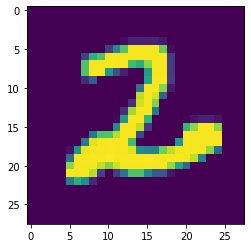

In [111]:
plt.imshow(mnist.test.images[r:r+1].reshape(28,28))

In [2]:
x_data = [1, 2, 3, 4, 5, 6, 7]
y_data = [25000, 55000, 75000, 110000, 128000, 155000, 180000]

In [3]:
X = tf.placeholder(tf.float32, shape=[None])
y = tf.placeholder(tf.float32, shape=[None])
W = tf.Variable(tf.random_normal([1]), dtype = tf.float32)
b = tf.Variable(tf.random_normal([1]), dtype = tf.float32)
hypot = W * X + b
cost = tf.reduce_mean(tf.square(hypot - y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(1001):
    _, c, weight, bias=sess.run([train, cost, W, b], feed_dict={X:x_data,
                                                       y: y_data })
print(sess.run(hypot, feed_dict={X : [8]}))
sess.close()

[206524.5]


In [7]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

In [10]:
X = tf.placeholder(tf.float32, shape = [None, 2])
y = tf.placeholder(tf.float32, shape = [None, 1])

W = tf.Variable(tf.random_normal([2, 1]))
b = tf.Variable(tf.random_normal([1]))

hypot = tf.sigmoid(tf.matmul(X, W) + b)

cost = -tf.reduce_mean(y * tf.log(hypot) + (1 - y) * tf.log(1 - hypot))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(10001):
    sess.run(train, feed_dict={X:x_data, y:y_data})
pred = tf.cast(hypot>0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(pred, y), dtype=tf.float32))
sess.run([pred, accuracy], feed_dict = {X:x_data, y:y_data})


[array([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]], dtype=float32),
 1.0]

In [ ]:
sess.close()